In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,mean_squared_error,mean_absolute_error
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv('car performance-dataset.csv')

In [3]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
y=data.iloc[:,0:1]

In [8]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [9]:
x=data.iloc[:,1:8]
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


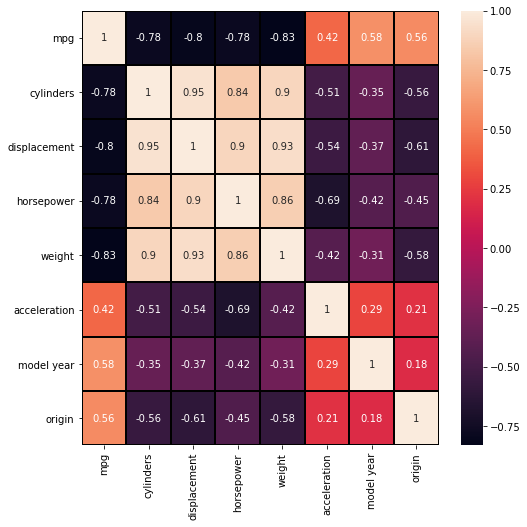

In [10]:
#importing necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr(),annot=True,linecolor ='black', linewidths = 1)
fig=plt.gcf()
fig.set_size_inches(8,8)

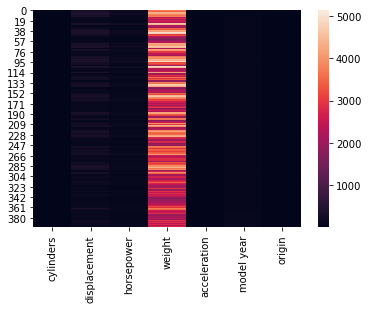

In [11]:
import seaborn as sns
ax = sns.heatmap(x)

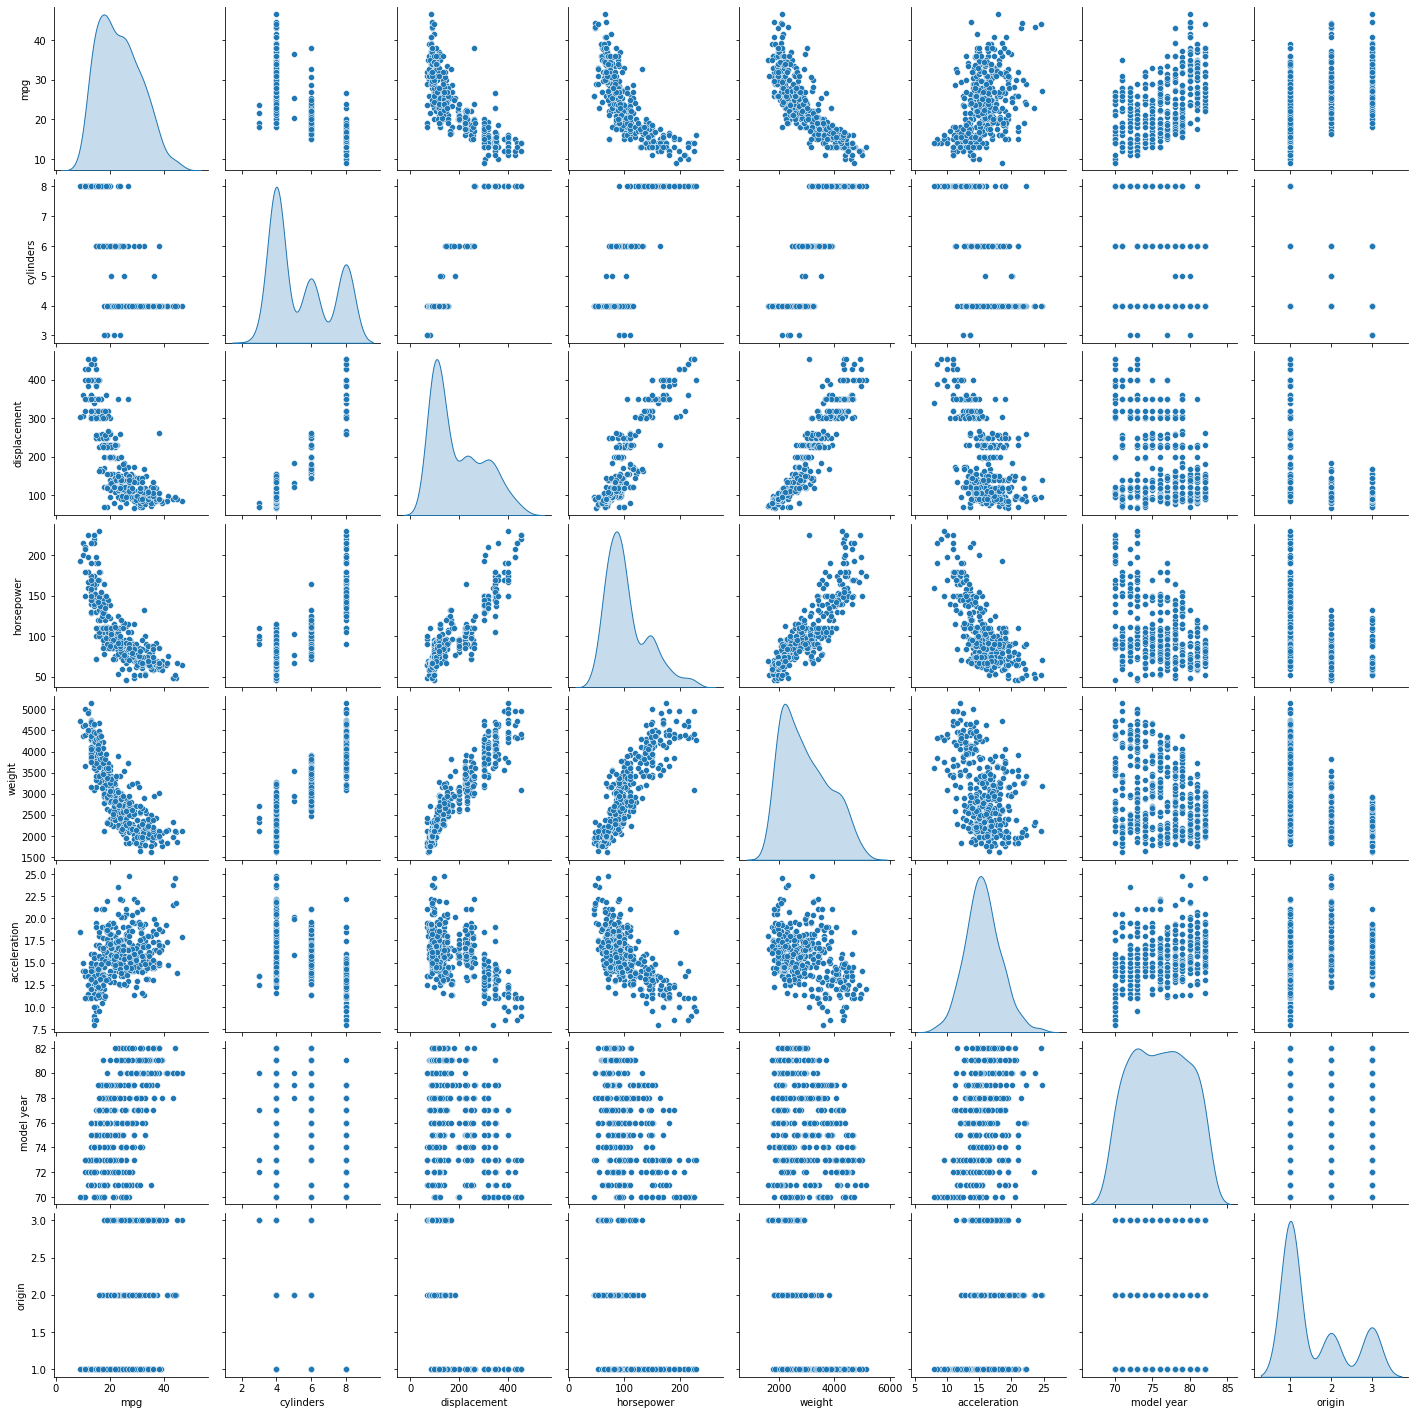

In [12]:
#PLOT THE PAIRWISE CORRELATION OF THE ATTRIBUTES TO GET THE BEST ANALYSIS
sns.pairplot(data,diag_kind='kde') 
plt.show()

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

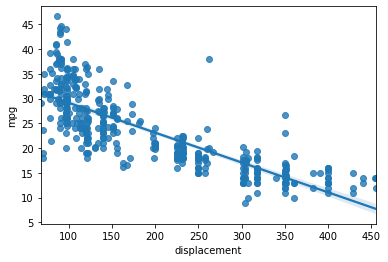

In [13]:
sns.regplot(x="displacement", y="mpg", data=data)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

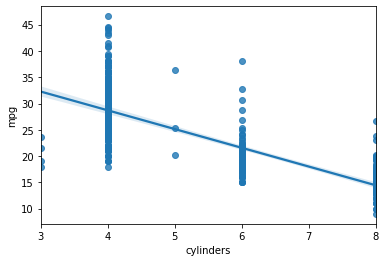

In [14]:
sns.regplot(x="cylinders", y="mpg", data=data)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

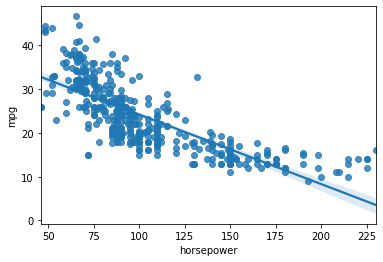

In [15]:
sns.regplot(x="horsepower", y="mpg", data=data)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

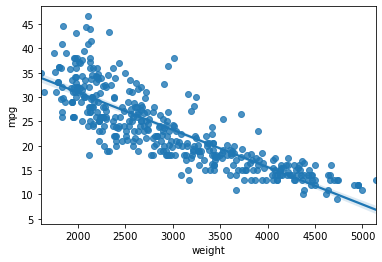

In [16]:
sns.regplot(x="weight", y="mpg", data=data)

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

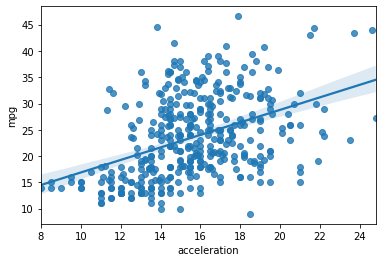

In [17]:
sns.regplot(x="acceleration", y="mpg", data=data)

<AxesSubplot:xlabel='model year', ylabel='mpg'>

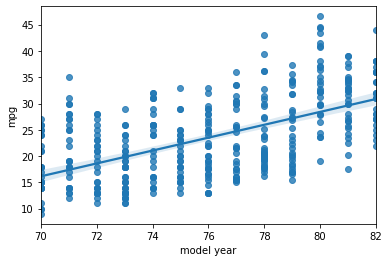

In [18]:
sns.regplot(x="model year", y="mpg", data=data)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

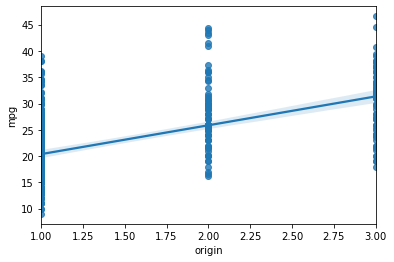

In [19]:
sns.regplot(x="origin", y="mpg", data=data)

<AxesSubplot:xlabel='mpg'>

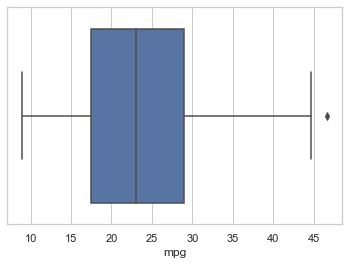

In [20]:
sns.set(style="whitegrid")
sns.boxplot(x=data["mpg"])

In [21]:
import statsmodels.formula.api as smf
from scipy import stats
pearson_coef, p_value = stats.pearsonr(data['displacement'], data['mpg'])
print(pearson_coef,p_value) 

-0.804202824805898 1.655888910192639e-91


In [22]:
pearson_coef, p_value = stats.pearsonr(data['cylinders'], data['mpg'])
print(pearson_coef,p_value) 

-0.7753962854205543 4.503992246176927e-81


In [23]:
pearson_coef, p_value = stats.pearsonr(data['horsepower'], data['mpg'])
print(pearson_coef,p_value) 

-0.7775013636276671 8.802190914914203e-82


In [24]:
pearson_coef, p_value = stats.pearsonr(data['weight'], data['mpg'])
print(pearson_coef,p_value) 

-0.831740933244335 2.9727995640500577e-103


In [25]:
pearson_coef, p_value = stats.pearsonr(data['acceleration'], data['mpg'])
print(pearson_coef,p_value) 

0.42028891210165065 1.823091535078553e-18


In [26]:
pearson_coef, p_value = stats.pearsonr(data['model year'], data['mpg'])
print(pearson_coef,p_value) 

0.5792671330833096 4.844935813365483e-37


In [27]:
pearson_coef, p_value = stats.pearsonr(data['origin'], data['mpg'])
print(pearson_coef,p_value) 

0.5634503597738432 1.0114822102335907e-34


In [28]:
test=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',data).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     167.6
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          8.18e-105
Time:                        13:11:31   Log-Likelihood:                -1129.2
No. Observations:                 398   AIC:                             2272.
Df Residuals:                     391   BIC:                             2300.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.4941      2.690     16.171      0.000      38.206      48.782
cylinders       -0.5537      0.402     -1.377      0.169      -1.344       0.237
displacement     0.0125      0.009      1.335      0.183      -0.006       0.031
horsepower      -0.0628      0.017     -3.797      0.000      -0.095      -0.030
weight          -0.0049      0.001     -6.168      0.000      -0.006      -0.003
acceleration    -0.0402      0.121     -0.332      0.740      -0.278       0.198
origin           1.4880      0.345      4.315      0.000       0.810       2.166
==============================================================================
Omnibus:                       31.632   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.557
Skew:                           0.613   Prob(JB):                     9.46e-10
Kurtosis:                       4.002   Cond. No.                     4.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#cols = x.columns
#min_max_scaler = MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(x)
#x = pd.DataFrame(np_scaled, columns = cols)

In [30]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [31]:
x=x.values
y=y.values


In [32]:
y=np.reshape(y,(398,))

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [34]:
def scores(y_test,ypreds):
    mse=mean_squared_error(y_test,ypreds)
    print('Mean Squared: ',mse)
    mae=mean_absolute_error(y_test,ypreds)
    print('Mean Absolute Error: ',mae)
    accuracy=r2_score(y_test,ypreds)
    print('R2_score: ',accuracy )
  
  

In [35]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [36]:
ypredlr=lr.predict(x_test)

In [37]:
print(ypredlr)

[13.00967075 24.17837774 11.40931118 20.84102122 17.40733067 29.79045882
 33.52610844 23.51876689 14.6688346  27.08881834 33.87922031 34.08456234
 21.30815307 26.04501146 16.2341128  30.96404189 28.68409287 28.97095081
 17.3760003  31.05112323 15.76987547 24.67257256 27.02340786 20.35100415
 29.75181158 28.62077861 31.20089836 30.48359625 29.90190444 17.94052359
 20.43457266 31.43628126 20.72090784 32.24921759 23.92860085 26.01285408
 21.20921058 16.8478706  32.2777473   9.0000764 ]


In [38]:
scores(y_test,ypredlr)

Mean Squared:  9.697403780857837
Mean Absolute Error:  2.4946514519331386
R2_score:  0.859700644271482


In [39]:
lr.score(x_test,y_test)

0.859700644271482

In [40]:
lr.intercept_

-17.284999204176728

In [41]:
lr.coef_


array([-0.43241036,  0.01969494, -0.01631524, -0.00661211,  0.08119764,
        0.75194963,  1.44272293])

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures(interaction_only=True)
x1=x
poly.fit_transform(x1)


array([[1.0000e+00, 8.0000e+00, 3.0700e+02, ..., 8.4000e+02, 1.2000e+01,
        7.0000e+01],
       [1.0000e+00, 8.0000e+00, 3.5000e+02, ..., 8.0500e+02, 1.1500e+01,
        7.0000e+01],
       [1.0000e+00, 8.0000e+00, 3.1800e+02, ..., 7.7000e+02, 1.1000e+01,
        7.0000e+01],
       ...,
       [1.0000e+00, 4.0000e+00, 1.3500e+02, ..., 9.5120e+02, 1.1600e+01,
        8.2000e+01],
       [1.0000e+00, 4.0000e+00, 1.2000e+02, ..., 1.5252e+03, 1.8600e+01,
        8.2000e+01],
       [1.0000e+00, 4.0000e+00, 1.1900e+02, ..., 1.5908e+03, 1.9400e+01,
        8.2000e+01]])

In [44]:
x1

array([[  8. , 307. , 130. , ...,  12. ,  70. ,   1. ],
       [  8. , 350. , 165. , ...,  11.5,  70. ,   1. ],
       [  8. , 318. , 150. , ...,  11. ,  70. ,   1. ],
       ...,
       [  4. , 135. ,  84. , ...,  11.6,  82. ,   1. ],
       [  4. , 120. ,  79. , ...,  18.6,  82. ,   1. ],
       [  4. , 119. ,  82. , ...,  19.4,  82. ,   1. ]])

In [45]:
poly_reg_model = LinearRegression()

In [46]:
poly_reg_model.fit(x1, y)

LinearRegression()

In [47]:
ypredpoly = poly_reg_model.predict(x_test)

In [48]:
ypredpoly

array([13.00967075, 24.17837774, 11.40931118, 20.84102122, 17.40733067,
       29.79045882, 33.52610844, 23.51876689, 14.6688346 , 27.08881834,
       33.87922031, 34.08456234, 21.30815307, 26.04501146, 16.2341128 ,
       30.96404189, 28.68409287, 28.97095081, 17.3760003 , 31.05112323,
       15.76987547, 24.67257256, 27.02340786, 20.35100415, 29.75181158,
       28.62077861, 31.20089836, 30.48359625, 29.90190444, 17.94052359,
       20.43457266, 31.43628126, 20.72090784, 32.24921759, 23.92860085,
       26.01285408, 21.20921058, 16.8478706 , 32.2777473 ,  9.0000764 ])

In [49]:
scores(y_test,ypredpoly)

Mean Squared:  9.697403780857837
Mean Absolute Error:  2.4946514519331386
R2_score:  0.859700644271482


In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
dtr = DecisionTreeRegressor()
dtr.fit(x,y)


DecisionTreeRegressor()

In [52]:
ypreddt = dtr.predict(x_test)


In [53]:
print(ypreddt)

[14.  25.  13.  21.  18.  35.  34.1 20.  15.  23.5 40.9 37.2 18.  23.
 15.5 35.7 31.  27.  18.  37.3 15.5 23.  24.  18.  34.5 25.4 36.1 34.
 30.  16.  18.6 37.  15.  33.5 22.4 24.  19.  16.9 31.9 12. ]


In [54]:
scores(y_test,ypreddt)

Mean Squared:  0.0
Mean Absolute Error:  0.0
R2_score:  1.0


In [55]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,random_state=0)
rf.fit(x,y)
ypredrf=rf.predict(x_test)
scores(y_test,ypredrf)

Mean Squared:  1.0828725000000003
Mean Absolute Error:  0.6717500000000003
R2_score:  0.9843333001781338


In [56]:
ypredrf=rf.predict(x_test)

In [57]:
ypredrf

array([14.  , 24.8 , 14.75, 20.92, 17.9 , 32.9 , 35.16, 20.5 , 14.9 ,
       23.83, 41.09, 38.5 , 18.02, 23.6 , 15.45, 34.62, 30.39, 26.59,
       17.85, 36.22, 15.55, 23.35, 24.  , 18.1 , 35.2 , 25.75, 36.03,
       32.95, 30.72, 15.8 , 18.78, 34.72, 16.82, 34.8 , 21.25, 24.3 ,
       18.84, 16.5 , 35.78, 12.1 ])

In [58]:
scores(y_test,ypredrf)

Mean Squared:  1.0828725000000003
Mean Absolute Error:  0.6717500000000003
R2_score:  0.9843333001781338


In [59]:
rf = RandomForestRegressor(n_estimators=20,random_state=0)
rf.fit(x,y)
ypredrf=rf.predict(x_test)
scores(y_test,ypredrf)

Mean Squared:  0.6317381250000004
Mean Absolute Error:  0.5603750000000003
R2_score:  0.9908601875378648


In [60]:
rf = RandomForestRegressor(n_estimators=20,random_state=42)
rf.fit(x,y)
ypredrf=rf.predict(x_test)
scores(y_test,ypredrf)

Mean Squared:  0.8594956249999998
Mean Absolute Error:  0.6813749999999995
R2_score:  0.9875650550225606


In [61]:
rf = RandomForestRegressor(n_estimators=30,random_state=0)
rf.fit(x,y)
ypredrf=rf.predict(x_test)
scores(y_test,ypredrf)

Mean Squared:  0.533465555555556
Mean Absolute Error:  0.5236666666666673
R2_score:  0.9922819678917011


In [62]:
rf = RandomForestRegressor(n_estimators=300,random_state=42)
rf.fit(x,y)
ypredrf=rf.predict(x_test)
scores(y_test,ypredrf)

Mean Squared:  0.5471064500000002
Mean Absolute Error:  0.5147166666666705
R2_score:  0.9920846152037688


In [63]:
import pickle 
pickle.dump(dtr,open("Car.pkl","wb"))

In [64]:
rf.predict([[8,307,130,3504,12,70,1]])

array([17.287])

In [65]:
rf.predict([[8,307,130,3504,12,70,2]])

array([17.287])

In [66]:
rf.predict([[19,307,130,3504,12,70,1]])

array([17.287])

In [67]:
rf.predict([[8,337,130,3504,12,70,1]])

array([16.871])

In [68]:
rf.predict([[118,307,130,3504,12,70,1]])

array([17.287])

In [69]:
rf.predict([[8,307,130,3504,22,70,1]])

array([16.224])

In [70]:
ypredrf

array([14.05166667, 24.637     , 13.515     , 20.86233333, 18.15566667,
       33.53333333, 34.14333333, 20.52266667, 15.06      , 24.693     ,
       39.241     , 37.358     , 18.27266667, 23.76333333, 15.62666667,
       35.14766667, 29.83      , 27.02166667, 17.873     , 36.64233333,
       15.67933333, 23.00933333, 23.91866667, 18.92466667, 34.58166667,
       25.938     , 35.53733333, 33.01666667, 31.37133333, 16.06333333,
       18.74166667, 35.13333333, 15.73733333, 33.14766667, 22.029     ,
       24.01433333, 18.89233333, 16.57333333, 33.69566667, 12.06333333])

In [71]:
x_test


array([[8.000e+00, 3.510e+02, 1.530e+02, 4.129e+03, 1.300e+01, 7.200e+01,
        1.000e+00],
       [4.000e+00, 1.400e+02, 7.500e+01, 2.542e+03, 1.700e+01, 7.400e+01,
        1.000e+00],
       [8.000e+00, 3.020e+02, 1.400e+02, 4.294e+03, 1.600e+01, 7.200e+01,
        1.000e+00],
       [4.000e+00, 1.200e+02, 8.700e+01, 2.979e+03, 1.950e+01, 7.200e+01,
        2.000e+00],
       [6.000e+00, 2.320e+02, 1.000e+02, 3.288e+03, 1.550e+01, 7.100e+01,
        1.000e+00],
       [4.000e+00, 7.200e+01, 6.900e+01, 1.613e+03, 1.800e+01, 7.100e+01,
        3.000e+00],
       [4.000e+00, 8.600e+01, 6.500e+01, 1.975e+03, 1.520e+01, 7.900e+01,
        3.000e+00],
       [4.000e+00, 1.400e+02, 9.000e+01, 2.408e+03, 1.950e+01, 7.200e+01,
        1.000e+00],
       [8.000e+00, 4.000e+02, 1.500e+02, 3.761e+03, 9.500e+00, 7.000e+01,
        1.000e+00],
       [6.000e+00, 1.730e+02, 1.100e+02, 2.725e+03, 1.260e+01, 8.100e+01,
        1.000e+00],
       [4.000e+00, 8.500e+01, 6.700e+01, 1.835e+03, 1.730e+0

In [72]:
rf.predict([[1, 0.73126615, 0.58152174, 0.71335413, 0.29761905,0.16666667, 0 ]])

array([29.18])

In [73]:
rf.predict([[8,307,130,3504,22,70,1]])

array([16.224])

In [74]:
dtr.predict([[8,307,130,3504,22,70,1]])

array([18.])